In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from env import TicTacToe
from utils import (
    run_episode_Q_learning,
    measure_metrics,
    plot_metric
)

# Часть первая: крестики-нолики при помощи Q-обучения [3 x 3]

In [2]:
# env vars
n_rows = 3
n_cols = 3
n_wins = 3
actions_space_size = n_rows * n_cols # размерность пространства действий
env = TicTacToe(n_rows=n_rows, n_cols=n_cols, n_win=n_wins)

In [3]:
# Q-learning vars
gamma = 1
alpha = 0.1
epsilon = 0.1

# learning process vars
total_episodes = 100_000
print_step = 10_000

### X vs 0_random

   episode     naught      cross      draws      states
         0       0.27       0.57       0.15           5
     10000       0.11       0.79       0.11        1940
     20000       0.06       0.82       0.12        2168
     30000       0.03       0.82       0.15        2259
     40000       0.06       0.81       0.14        2326
     50000       0.04       0.79       0.17        2380
     60000       0.05        0.8       0.15        2428
     70000       0.03       0.84       0.13        2460
     80000       0.05       0.79       0.16        2497
     90000       0.05       0.79       0.17        2517
    100000       0.07       0.77       0.16        2531


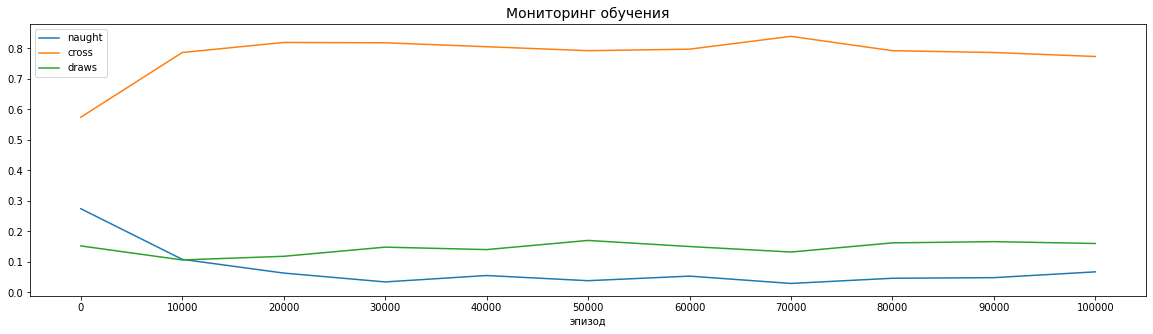

In [4]:
metrics_lst = []

# начальная стратегия
Q_cross = {}


# запуск обучения
print('%10s %10s %10s %10s  %10s' % ('episode', 'naught', 'cross', 'draws', 'states'))
for i in range(total_episodes + 1):
    _, Q_cross, winner = run_episode_Q_learning(
        action_type_naught='random', 
        action_type_cross='exploration', 
        env=env, 
        Q_naught=None, 
        Q_cross=Q_cross,
        n_action=actions_space_size,
        learner=1, # обучаем крестик
        alpha=alpha, epsilon=epsilon, gamma=gamma, 
        verbosity=False
    )
    
    # мониторинг процесса обучения
    if i % print_step == 0:
        score = measure_metrics(
                n_episodes=1_000, 
                action_type_naught='random', action_type_cross='greedy',
                env=env, Q_naught=None, Q_cross=Q_cross,
                epsilon=None,
                verbosity=False
            )
        metrics_lst.append(score)
        print('%10s %10s %10s %10s  %10s' % (
            i, 
            round(score[-1] / sum(score.values()), 2),
            round(score[1] / sum(score.values()), 2),
            round(score[0] / sum(score.values()), 2),
            len(Q_cross)
        ))

# график        
plot_metric(metrics_lst, print_step)

### 0 vs X_random

   episode     naught      cross      draws      states
         0       0.27        0.6       0.13           5
     10000        0.4       0.35       0.25        2388
     20000       0.46       0.23       0.31        2611
     30000       0.39        0.2       0.41        2669
     40000       0.47       0.16       0.37        2699
     50000       0.51        0.1       0.39        2714
     60000       0.42       0.11       0.47        2720
     70000       0.47       0.09       0.45        2725
     80000        0.4       0.11       0.49        2726
     90000       0.41        0.1       0.49        2726
    100000       0.47       0.08       0.45        2727


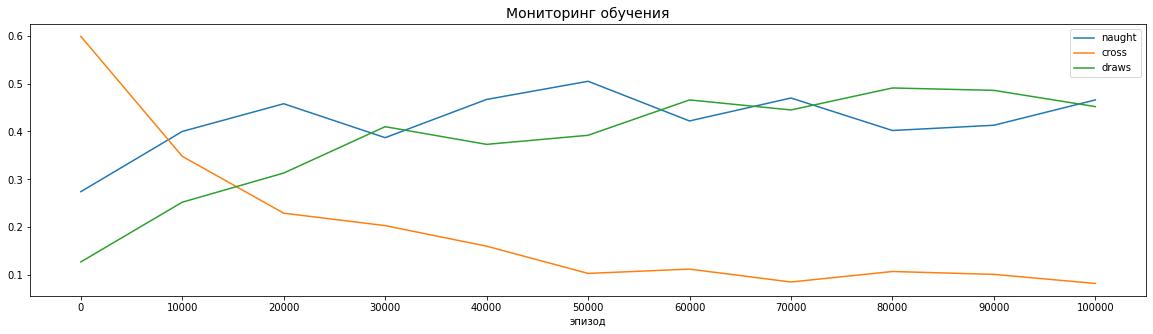

In [5]:
metrics_lst = []

# начальная стратегия
Q_naught = {}


# запуск обучения
print('%10s %10s %10s %10s  %10s' % ('episode', 'naught', 'cross', 'draws', 'states'))
for i in range(total_episodes + 1):
    Q_naught, _, winner = run_episode_Q_learning(
        action_type_naught='exploration', 
        action_type_cross='random', 
        env=env, 
        Q_naught=Q_naught, 
        Q_cross=None,
        n_action=actions_space_size,
        learner=-1, # обучаем нолик
        alpha=alpha, epsilon=epsilon, gamma=gamma, 
        verbosity=False
    )
    
    # мониторинг процесса обучения
    if i % print_step == 0:
        score = measure_metrics(
                n_episodes=1_000, 
                action_type_naught='greedy', action_type_cross='random',
                env=env, Q_naught=Q_naught, Q_cross=None,
                epsilon=None,
                verbosity=False
            )
        metrics_lst.append(score)
        print('%10s %10s %10s %10s  %10s' % (
            i, 
            round(score[-1] / sum(score.values()), 2),
            round(score[1] / sum(score.values()), 2),
            round(score[0] / sum(score.values()), 2),
            len(Q_naught)
        ))

# график        
plot_metric(metrics_lst, print_step)

### X vs 0

Одновременное обучение можно организовать, например, поочередно: 
<br> - первый эпизод учится крестик
<br> - второй эпизод учится нолик
<br> - третий эпизод учится крестик
<br> - и т.д.

   episode     naught      cross      draws    state_X    state_0
         0        0.2       0.68       0.12          4          3
     10000        1.0        0.0        0.0       1100       1128
     20000        1.0        0.0        0.0       1496       1531
     30000        0.0        0.0        1.0       1633       1662
     40000        0.0        0.0        1.0       1724       1755
     50000        0.0        0.0        1.0       1771       1802
     60000        0.0        0.0        1.0       1820       1844
     70000        0.0        0.0        1.0       1887       1926
     80000        0.0        0.0        1.0       1960       2000
     90000        0.0        0.0        1.0       1999       2037
    100000        0.0        0.0        1.0       2016       2055


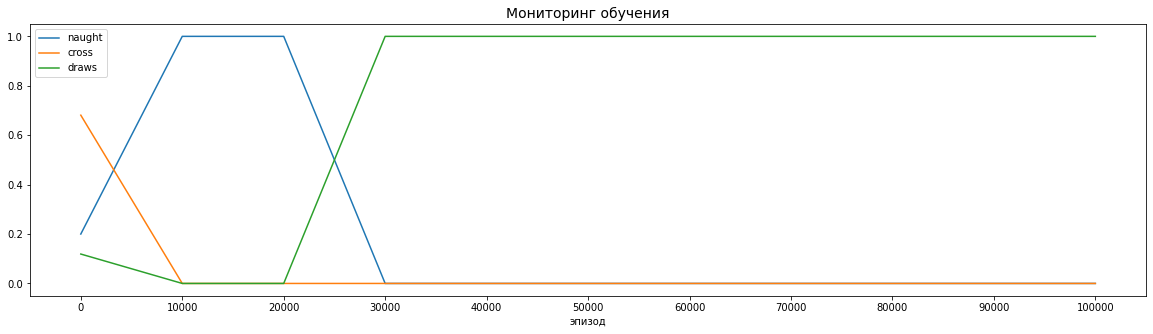

In [14]:
metrics_lst = []

# начальная стратегия
Q_naught = {}
Q_cross = {}

# запуск обучения
print('%10s %10s %10s %10s %10s %10s' % ('episode', 'naught', 'cross', 'draws', 'state_X', 'state_0'))
for i in range(total_episodes + 1):
    if i % 2 == 0: # учу крестик
        _, Q_cross, winner = run_episode_Q_learning(
            action_type_naught='exploration', 
            action_type_cross='exploration', 
            env=env, 
            Q_naught=Q_naught, 
            Q_cross=Q_cross,
            n_action=actions_space_size,
            learner=1,
            alpha=alpha, epsilon=epsilon, gamma=gamma, 
            verbosity=False
        )
    else: # учу нолик
        Q_naught, _, winner = run_episode_Q_learning(
            action_type_naught='exploration', 
            action_type_cross='exploration', 
            env=env, 
            Q_naught=Q_naught, 
            Q_cross=Q_cross, 
            n_action=actions_space_size,
            learner=-1,
            alpha=alpha, epsilon=epsilon, gamma=gamma, 
            verbosity=False
        )
        
    # мониторинг процесса обучения
    if i % print_step == 0:
        score = measure_metrics(
                n_episodes=1_000, 
                action_type_naught='greedy', action_type_cross='greedy',
                env=env, Q_naught=Q_naught, Q_cross=Q_cross,
                epsilon=None,
                verbosity=False
            )
        metrics_lst.append(score)
        print('%10s %10s %10s %10s %10s %10s' % (
            i, 
            round(score[-1] / sum(score.values()), 2),
            round(score[1] / sum(score.values()), 2),
            round(score[0] / sum(score.values()), 2),
            len(Q_cross),
            len(Q_naught)
        ))

# график        
plot_metric(metrics_lst, print_step)

# Часть первая: крестики-нолики при помощи Q-обучения [5 x 5]

In [6]:
# env vars
n_rows = 5
n_cols = 5
n_wins = 4
actions_space_size = n_rows * n_cols # размерность пространства действий
env = TicTacToe(n_rows=n_rows, n_cols=n_cols, n_win=n_wins)

In [20]:
# Q-learning vars
gamma = 1
alpha = 0.1
epsilon = 0.1

### X vs 0_random

In [ ]:
# learning process vars
total_episodes = 1_000_000
print_step = 100_000

   episode     naught      cross      draws    states_X
         0       0.39       0.54       0.07           9
    100000       0.41       0.53       0.06      674121
    200000       0.35       0.56       0.08     1309715
    300000       0.36       0.57       0.07     1941457
    400000       0.36       0.57       0.07     2574084
    500000       0.32       0.62       0.06     3193329
    600000       0.34        0.6       0.06     3796994
    700000       0.32       0.62       0.06     4394537
    800000       0.29       0.65       0.06     4989636
    900000       0.32       0.62       0.06     5576241
   1000000       0.32       0.62       0.06     6159799


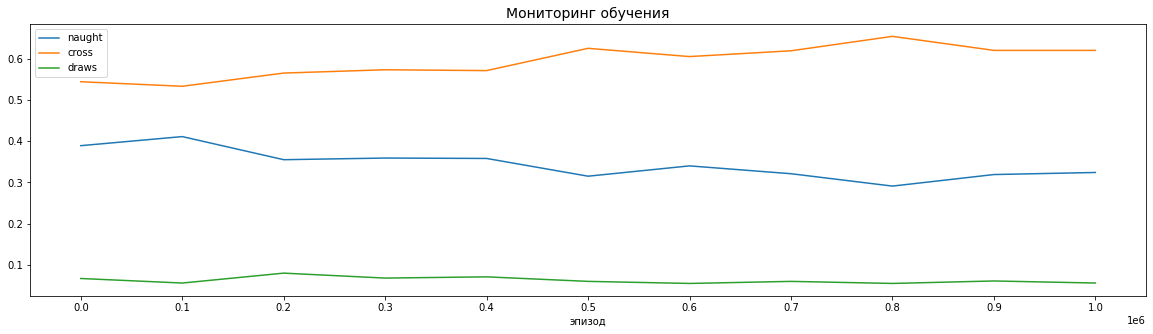

In [12]:
metrics_lst = []

# начальная стратегия
Q_cross = {}


# запуск обучения
print('%10s %10s %10s %10s  %10s' % ('episode', 'naught', 'cross', 'draws', 'states_X'))
for i in range(total_episodes + 1):
    _, Q_cross, winner = run_episode_Q_learning(
        action_type_naught='random', 
        action_type_cross='exploration', 
        env=env, 
        Q_naught=None, 
        Q_cross=Q_cross,
        n_action=actions_space_size,
        learner=1, # обучаем крестик
        alpha=alpha, epsilon=epsilon, gamma=gamma, 
        verbosity=False
    )
    
    # мониторинг процесса обучения
    if i % print_step == 0:
        score = measure_metrics(
                n_episodes=1_000, 
                action_type_naught='random', action_type_cross='greedy',
                env=env, Q_naught=None, Q_cross=Q_cross,
                epsilon=None,
                verbosity=False
            )
        metrics_lst.append(score)
        print('%10s %10s %10s %10s  %10s' % (
            i, 
            round(score[-1] / sum(score.values()), 2),
            round(score[1] / sum(score.values()), 2),
            round(score[0] / sum(score.values()), 2),
            len(Q_cross)
        ))

# график        
plot_metric(metrics_lst, print_step)

### 0 vs X_random

In [25]:
total_episodes = 2_000_000
print_step = 200_000

   episode     naught      cross      draws      states
         0       0.42       0.52       0.06          12
    200000       0.42        0.5       0.07     1391980
    400000       0.38       0.55       0.07     2750219
    600000       0.41       0.52       0.07     4080679
    800000       0.39       0.54       0.06     5380957
   1000000       0.41       0.52       0.07     6656867
   1200000       0.42       0.53       0.05     7915191
   1400000       0.41       0.54       0.06     9173209
   1600000       0.42        0.5       0.08    10426557
   1800000       0.41       0.53       0.06    11672002
   2000000       0.38       0.55       0.07    12916220


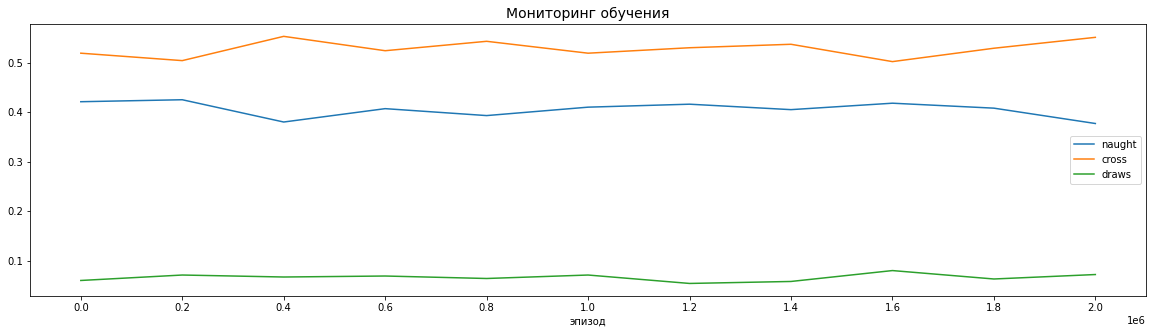

In [26]:
metrics_lst = []

# начальная стратегия
Q_naught = {}


# запуск обучения
print('%10s %10s %10s %10s  %10s' % ('episode', 'naught', 'cross', 'draws', 'states'))
for i in range(total_episodes + 1):
    Q_naught, _, winner = run_episode_Q_learning(
        action_type_naught='exploration', 
        action_type_cross='random', 
        env=env, 
        Q_naught=Q_naught, 
        Q_cross=None,
        n_action=actions_space_size,
        learner=-1, # обучаем нолик
        alpha=alpha, epsilon=epsilon, gamma=gamma, 
        verbosity=False
    )
    
    # мониторинг процесса обучения
    if i % print_step == 0:
        score = measure_metrics(
                n_episodes=1_000, 
                action_type_naught='greedy', action_type_cross='random',
                env=env, Q_naught=Q_naught, Q_cross=None,
                epsilon=None,
                verbosity=False
            )
        metrics_lst.append(score)
        print('%10s %10s %10s %10s  %10s' % (
            i, 
            round(score[-1] / sum(score.values()), 2),
            round(score[1] / sum(score.values()), 2),
            round(score[0] / sum(score.values()), 2),
            len(Q_naught)
        ))

# график        
plot_metric(metrics_lst, print_step)

### X vs 0

In [22]:
total_episodes = 5_000_000
print_step = 200_000

   episode     naught      cross      draws    state_X    state_0
         0        0.0        1.0        0.0         10          9
    200000        0.0        0.0        1.0     180338     180285
    400000        0.0        0.0        1.0     347012     346923
    600000        0.0        1.0        0.0     513011     512787
    800000        0.0        0.0        1.0     671974     671628
   1000000        1.0        0.0        0.0     832258     831875
   1200000        0.0        0.0        1.0     986961     986475
   1400000        1.0        0.0        0.0    1148886    1148262
   1600000        0.0        1.0        0.0    1306106    1305339
   1800000        0.0        0.0        1.0    1458604    1457679
   2000000        0.0        0.0        1.0    1609474    1608402
   2200000        0.0        0.0        1.0    1757885    1756692
   2400000        0.0        0.0        1.0    1903122    1901842
   2600000        0.0        1.0        0.0    2053177    2051769
   2800000

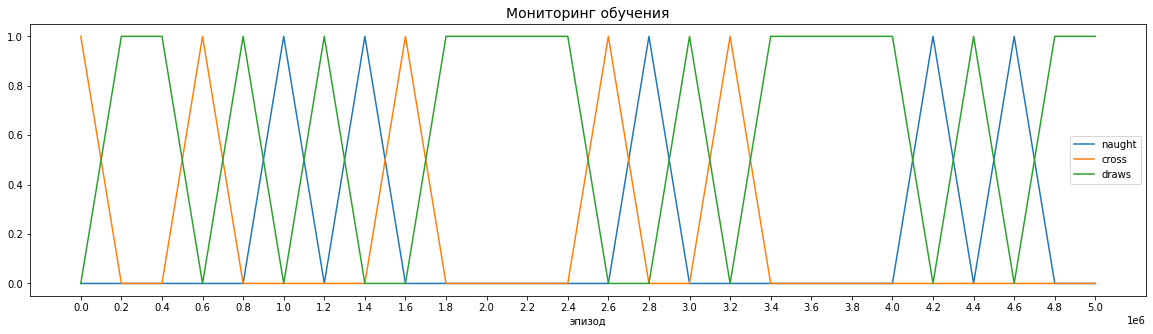

In [23]:
metrics_lst = []

# начальная стратегия
Q_naught = {}
Q_cross = {}

# запуск обучения
print('%10s %10s %10s %10s %10s %10s' % ('episode', 'naught', 'cross', 'draws', 'state_X', 'state_0'))
for i in range(total_episodes + 1):
    if i % 2 == 0: # учу крестик
        _, Q_cross, winner = run_episode_Q_learning(
            action_type_naught='greedy', 
            action_type_cross='exploration', 
            env=env, 
            Q_naught=Q_naught, 
            Q_cross=Q_cross,
            n_action=actions_space_size,
            learner=1,
            alpha=alpha, epsilon=epsilon, gamma=gamma, 
            verbosity=False
        )
    else: # учу нолик
        Q_naught, _, winner = run_episode_Q_learning(
            action_type_naught='exploration', 
            action_type_cross='greedy', 
            env=env, 
            Q_naught=Q_naught, 
            Q_cross=Q_cross, 
            n_action=actions_space_size,
            learner=-1,
            alpha=alpha, epsilon=epsilon, gamma=gamma, 
            verbosity=False
        )
        
    # мониторинг процесса обучения
    if i % print_step == 0:
        score = measure_metrics(
                n_episodes=1_000, 
                action_type_naught='greedy', action_type_cross='greedy',
                env=env, Q_naught=Q_naught, Q_cross=Q_cross,
                epsilon=None,
                verbosity=False
            )
        metrics_lst.append(score)
        print('%10s %10s %10s %10s %10s %10s' % (
            i, 
            round(score[-1] / sum(score.values()), 2),
            round(score[1] / sum(score.values()), 2),
            round(score[0] / sum(score.values()), 2),
            len(Q_cross),
            len(Q_naught)
        ))

# график        
plot_metric(metrics_lst, print_step)

# Часть третья: MCTS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

from env import TicTacToe
from mcts import MCTS
from utils import measure_metrics, plot_metric

In [2]:
# env vars
n_rows = 3
n_cols = 3
n_wins = 3
actions_space_size = n_rows * n_cols # размерность пространства действий
env = TicTacToe(n_rows=n_rows, n_cols=n_cols, n_win=n_wins)

In [3]:
# mcts vars
player = 1
rollout_factor = 5 # rollouts =  rollout_factor x number_sub_nodes

### Подберем параметр "с" в игре против случайной стратегии

In [4]:
c_results_lst = []
for c in np.arange(0, 3.1, 0.1):
    mcts = MCTS(env=env, player=player, rollout_factor=rollout_factor, uct_c_constant=c)
    metrics = measure_metrics(
        n_episodes=1_000,
        action_type_naught='random',
        action_type_cross='mcts',
        env=env,
        Q_naught=None, # use random
        Q_cross=None, # use mcts
        epsilon=None,
        verbosity=False,
        mcts=mcts
    )
    c_results_lst.append([c, round(metrics[1] / sum(metrics.values()), 2)])

100%|██████████| 1000/1000 [00:41<00:00, 24.18it/s]


In [9]:
c_results_lst = sorted(c_results_lst, key=lambda x: x[1], reverse=True) 
for i in c_results_lst:
    print(f"c = {round(i[0], 1)}, cross_wins = {round(i[1], 2)}")

c = 1.1, cross_wins = 0.63
c = 1.8, cross_wins = 0.62
c = 2.1, cross_wins = 0.61
c = 0.0, cross_wins = 0.6
c = 0.9, cross_wins = 0.6
c = 1.3, cross_wins = 0.6
c = 1.6, cross_wins = 0.6
c = 2.3, cross_wins = 0.6
c = 2.8, cross_wins = 0.6
c = 2.9, cross_wins = 0.6
c = 0.1, cross_wins = 0.59
c = 0.4, cross_wins = 0.59
c = 0.5, cross_wins = 0.59
c = 0.7, cross_wins = 0.59
c = 1.2, cross_wins = 0.59
c = 1.4, cross_wins = 0.59
c = 1.7, cross_wins = 0.59
c = 2.2, cross_wins = 0.59
c = 2.5, cross_wins = 0.59
c = 0.8, cross_wins = 0.58
c = 1.5, cross_wins = 0.58
c = 2.4, cross_wins = 0.58
c = 3.0, cross_wins = 0.58
c = 0.2, cross_wins = 0.57
c = 0.3, cross_wins = 0.57
c = 1.9, cross_wins = 0.57
c = 2.6, cross_wins = 0.57
c = 0.6, cross_wins = 0.56
c = 1.0, cross_wins = 0.56
c = 2.7, cross_wins = 0.56
c = 2.0, cross_wins = 0.55


### Сравним 3 подхода: X_random, X_q_learning, X_mcts VS 0_random

In [40]:
# X_random
metric = measure_metrics(
        n_episodes=1_000,
        action_type_naught='random',
        action_type_cross='random',
        env=env,
        Q_naught=None, # use random
        Q_cross=None, # use random
        epsilon=None,
        verbosity=True
    )

100%|██████████| 1000/1000 [00:00<00:00, 2077.99it/s]

naught wins = 0.31 
cross wins = 0.56 
draws = 0.13



In [45]:
# X_q_learning
measure_metrics(
        n_episodes=1_000,
        action_type_naught='random',
        action_type_cross='greedy',
        env=env,
        Q_naught=None, # use random
        Q_cross=Q_cross,
        epsilon=None,
        verbosity=True
    )

100%|██████████| 1000/1000 [00:00<00:00, 1855.64it/s]

naught wins = 0.01 
cross wins = 0.75 
draws = 0.24



{-1: 12, 0: 239, 1: 749}

In [55]:
# X_mcts
player = 1
rollout_factor = 5 # rollouts =  rollout_factor x number_sub_nodes
c = 1.1
mcts = MCTS(env=env, player=player, rollout_factor=rollout_factor, uct_c_constant=c)
metrics = measure_metrics(
        n_episodes=1_000,
        action_type_naught='random',
        action_type_cross='mcts',
        env=env,
        Q_naught=None, # use random
        Q_cross=None, # use mcts
        epsilon=None,
        verbosity=True,
        mcts=mcts
    )

100%|██████████| 1000/1000 [00:08<00:00, 122.18it/s]

naught wins = 0.19 
cross wins = 0.77 
draws = 0.04



Результаты MCTS оказались самыми высокими, но сопоставимыми с Q_обучением.